In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Watershed Algorithm
- gray scale 이미지에서 픽셀 값에 따른 높낮이에 따라 산맥이 둘러져있고 물을 채우기 시작하다보면 일정 높이에서 물이 합쳐지려 하는데 이를 피하기 위해 해당 순간에 경계를 생성한다는 아이디어에서 출발
- 위의 방법은 noise나 불규칙적 요소 등으로 인해 오류가 날 수 있음
- 각 계곡을 구성하는 화소들을 merge하여 번호를 매기고, 병합 불가능한 곳은 '0'으로 매기는데 이를 <u>Interactive Image Segmentation</u>이라함.
- watershed 알고리즘에 의해 분할 경계선이 생기며 경계선의 값은 '-1'

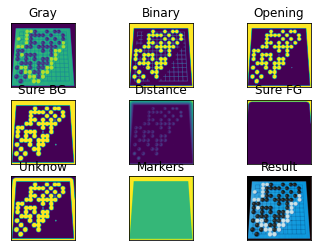

In [7]:
img = cv2.imread('/Users/sejongpyo/downloads/baduk.png')

# transform to binary image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# remove noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 이미지 확장 -> 배경 요소 확보
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# distance transform 적용하여 중심으로부터 skeleton image 얻을 수 있음
# 이 결과에 threshold 적용하여 확실한 객체 요소 확보
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg) # distance 이미지로부터 threshold 처리를 통해 얻어진 것

# 배경과 전경을 제회한 영역 확보
unknown = cv2.subtract(sure_bg, sure_fg)

# marker
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# watershed 적용
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

images = [gray,thresh,opening, sure_bg, dist_transform, sure_fg, unknown, markers, img]
titles = ['Gray', 'Binary', 'Opening', 'Sure BG', 'Distance', 'Sure FG', 'Unknow', 'Markers', 'Result']
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()